# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
!ls

'Copy of Team 1 - UFC Fighters.ipynb'  'Team 3 - Kickstarter.ipynb'
 google-play-store.csv		       'Team 4 - TED Talks.ipynb'
'Team 1 - UFC Fighters.ipynb'	       'Team 5 - Global Terrorism.ipynb'
'Team 2 - Google Play Store.ipynb'     'Team 6 - World Cup.ipynb'


In [5]:
# Start your codes here!
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv('google-play-store.csv')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Clean the data 

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
print("Shape of data (samples, features): ",df.shape)
print("Data Types: \n", df.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


In [9]:
def missing_value_of_data(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total/df.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])


missing_value_of_data(df)

,Total,Percentage
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Content Rating,1,0.01
Type,1,0.01
Last Updated,0,0.00
Genres,0,0.00
Price,0,0.00
Installs,0,0.00
Size,0,0.00


Chúng ta sẽ xử lý dữ liệu theo thứ tự như sau.
1. [App](#app)
2. [Category](#cat)
3. [Rating](#rating)
4. [Type](#type)
5. [Size](#size)
6. [Installs](#installs)
7. [Content Rating](#content_rating)
8. [Genres](#genres)
9. [Current Version](#current_version)
10. [Android Version](#android_version)
11. [Price](#price)

# <a id=app> Xử lý cột app </a>


In [12]:
df["App"].nunique()

9660

In [13]:
df["App"].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
My Study Life - School Planner                       1
Mozart Baby Sleep                                    1
GlassesOff                                           1
Svenska Dagbladet                                    1
BJ Bridge Standard American 2018                     1
Name: App, Length: 9660, dtype: int64

In [14]:
df.drop_duplicates(subset = "App", inplace = True)

In [15]:
df["App"].value_counts()

DW Amharic by AudioNow Digital                        1
Home Pony 2                                           1
Smart Launcher theme b. gold                          1
Free Messages, Video, Chat,Text for Messenger Plus    1
WiFi FPV                                              1
                                                     ..
DM Buddy » Learn Digital Marketing                    1
Pou                                                   1
Flight & Hotel Booking App - ixigo                    1
StarTimes - Live International Champions Cup          1
BJ Bridge Standard American 2018                      1
Name: App, Length: 9660, dtype: int64

In [16]:
df.shape

(9660, 13)

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# <a id=cat> Xử lý cột Category </a>

In [21]:
df.Category.value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Chúng ta thấy một danh mục ko hợp lý là "1.9"

In [22]:
df[df.Category == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df.at[10472, "Category"] = "PHOTOGRAPHY"
df.at[10472, "Installs"] = "1,000,000+"
df.at[10472, "Price"] = "0"
df.at[10472, "Last Updated"] = "July 20, 2018"
df.at[10472, "Current Ver"] = "1.0.19"
df.at[10472, "Android Ver"] = "4.0 and up"

In [24]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,19.0,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


## <a id = rating> Xử lý cột Rating </a> 

In [25]:
df.Rating.value_counts()

4.3     897
4.4     895
4.5     848
4.2     810
4.6     683
4.1     621
4.0     513
4.7     442
3.9     359
3.8     286
5.0     271
3.7     224
4.8     221
3.6     167
3.5     156
3.4     126
3.3     100
4.9      85
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
19.0      1
Name: Rating, dtype: int64

Ta thấy có một rating là 19.0 (vô lý vì max là 5)

In [26]:
df[df.Rating==19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,19.0,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [27]:
# repalce this = mean()
avg_rating = df.Rating.mean()
df.at[10472, "Rating"] = round(avg_rating, 1)

In [33]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                4.2
Reviews                                              3.0M
Size                                               1,000+
Installs                                       1,000,000+
Type                                                    0
Price                                                   0
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                July 20, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [34]:
df["Rating"].isnull().sum()

1463

In [35]:
df["Rating"] = df.groupby("Category").transform(lambda x: x.fillna(round(x.mean(),1)))

Text(0, 0.5, 'Frequency')

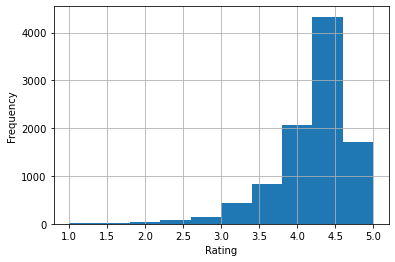

In [63]:
df.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

## <a id=type>Xử lý type</a>

In [37]:
df["Type"].value_counts()

Free    8902
Paid     756
0          1
Name: Type, dtype: int64

In [38]:
df.loc[df["Type"] == "0"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+","1,000,000+",0,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [39]:
df.at[10472, "Type"] = "Free"


In [40]:
df["Type"].isnull().sum()

1

In [41]:
df[df["Type"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [42]:
df.at[9148, "Type"] = "Free"

In [43]:
labels = df["Type"].value_counts().index

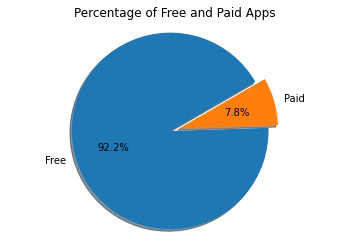

In [45]:
labels = df["Type"].value_counts().index
sizes = df["Type"].value_counts()
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Free and Paid Apps")
plt.show()

## <a id=size> Xử lý size </a>

In [46]:
df['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
695k                     1
716k                     1
516k                     1
259k                     1
48k                      1
Name: Size, Length: 462, dtype: int64

In [49]:
df['Size'].isnull().sum()

0

In [54]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Ta thấy lượt size được tính theo kilo và mega byte. Chúng ta sẽ cover chúng thành float có cùng đơn vị là kilo byte

In [55]:
def size_convert(i):
    if "M" in i:
        return float(i[:-1]) * 1000
    elif "K" in i:
        return float(i[:-1])
    else:
        return i
df["Size"] = df["Size"].apply(size_convert)

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## <a id="installs"> Xử lý cột Install </a>

In [58]:
df["Installs"].isnull().sum()

0

In [59]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [60]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace(',',''))
df["Installs"] = df["Installs"].apply(lambda x: x.replace('+',''))
df["Installs"] = df["Installs"].apply(lambda x: int(x))

In [61]:
df["Installs"].nunique()

20

In [65]:
df.Installs.value_counts()

1000000       1418
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [66]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9500,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## <a id=content_rating>Xử lý Content Rating </a>

In [67]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [69]:
df[df["Content Rating"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+",1000000,Free,0,NaN,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [70]:
df.at[10472, "Content Rating"] = "Everyone"

In [71]:
df["Content Rating"].isnull().sum()

0

## <a id =genres> Xử lý Genres</a>

In [72]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [73]:
df.loc[df["Genres"] == "February 11, 2018"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,4.2,3.0M,"1,000+",1000000,Free,0,Everyone,"February 11, 2018","July 20, 2018",1.0.19,4.0 and up


In [74]:
df.at[10472, "Genres"] = "Photography"

## <a id=current_version>Xử lý Current version </a>

In [76]:
df["Current Ver"].isnull().sum()

8

In [77]:
df["Current Ver"].fillna("1.0", inplace = True)

## <a id=android_version> Xử lý Android Version </a>

In [78]:
df["Android Ver"].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1286
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
5.0 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

Ta sẽ chuyển các version sau thành "4.0 and up": 
4.0.3 - 7.1.1 2 5.0 - 8.0 2 7.0 - 7.1.1 1 4.1 - 7.1.1 1 5.0 - 7.1.1 1 5.0 - 6.0 1 2.2 - 7.1.1 1

In [79]:
def and_version(i):
    if str(i) == "4.4W and up":
        return "4.4 and up"
    elif "-" in str(i):
        return str(i.split(" ")[0]) + " and up"
    else:
        return i

df["Android Ver"] = df["Android Ver"].apply(and_version)

In [80]:
df["Android Ver"].value_counts()

4.1 and up            2203
4.0.3 and up          1397
4.0 and up            1286
Varies with device     990
4.4 and up             829
2.3 and up             616
5.0 and up             516
4.2 and up             372
2.3.3 and up           273
2.2 and up             240
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              43
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
Name: Android Ver, dtype: int64

In [81]:
df.loc[df["Android Ver"].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000,1000,Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100,10000,Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [83]:
df["Android Ver"].fillna("1.0", inplace = True)

## <a id=price>Xử lý cột Price</a>

In [84]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [87]:
df.Price=df.Price.apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Frequency')

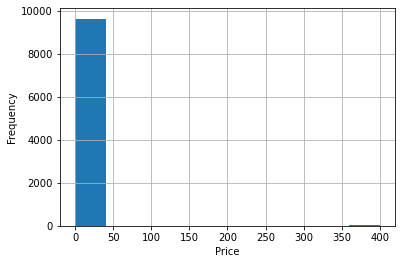

In [89]:
df.Price=pd.to_numeric(df.Price)
df.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')

In [91]:
# df.to_csv("clean.csv")

# Perform Exploratory Data Analysis on the dataset

In [116]:
df = pd.read_csv('clean.csv')

Tổng quan chung:

1) App :- Name of the App

2) Category :- Category under which the App falls.

3) Rating :- Application's rating on playstore

4) Reviews :- Number of reviews of the App.

5) Size :- Size of the App.

6) Install :- Number of Installs of the App

7) Type :- If the App is free/paid

8) Price :- Price of the app (0 if it is Free)

9) Content Rating :- Appropiate Target Audience of the App.

10) Genres:- Genre under which the App falls.

11) Last Updated :- Date when the App was last updated

12) Current Ver :- Current Version of the Application

13) Android Ver :- Minimum Android Version required to run the App

In [117]:
def reviews_convert(i):
    if 'M' in i:
        return float(i[:-1]) * 1e6
    else:
        return float(i)
df["Reviews"] = df["Reviews"].apply(reviews_convert)

In [122]:
df.sort_values(by = 'Reviews', ascending = False ).iloc[0]['App']

'Facebook'

Vậy app có nhiều lượt reivews nhất là Facebook 

Ta sẽ xem các app có lượt tải về cao nhất.

In [127]:
appInst = df.sort_values(by = 'Installs', ascending = False).head(10)

In [128]:
appInst

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2720,3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
299,335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2003,2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
302,338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
152,152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1356,1654,Subway Surfers,GAME,4.5,27722264.0,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
300,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2930,3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
701,865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
2977,3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13000.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


Hiển thị các chủ đề có nhiều app nhất.

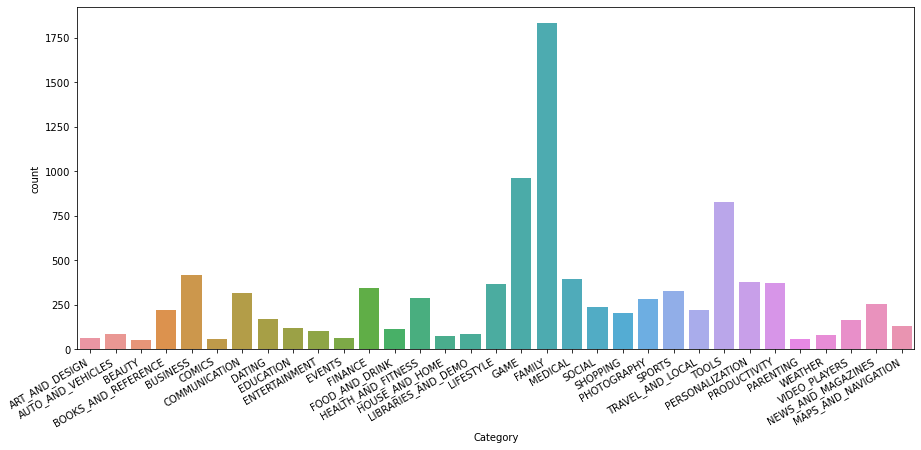

,Category,Count
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376


In [140]:
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    fig.autofmt_xdate()
    countplot=sns.categorical.countplot(df.Category,ax=ax)
    plt.show(countplot)

plot_number_category()

# Tabular representation
top_cat=df.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

### Ta sẽ so sanh lượt tải về của các chủ đề này 


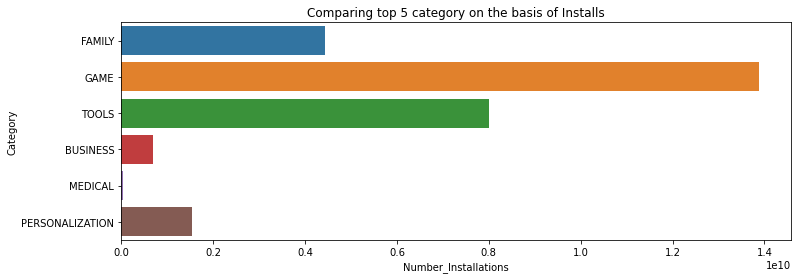

In [142]:

cat=top_cat.Category.tolist()
data_top6=df.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Number_Installations')
data=df.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')

#Comparing top 5 category on the basis of 'Installs'
def compare_6(data):
    fig = plt.figure(figsize=(12,4))
    title=plt.title('Comparing top 5 category on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)

#Comparing all categoryies on the basis of 'Installs'
def compare_all(data):
    fig = plt.figure(figsize=(12,7))
    title=plt.title('Comparing all categories on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)
    
compare_6(data_top6)


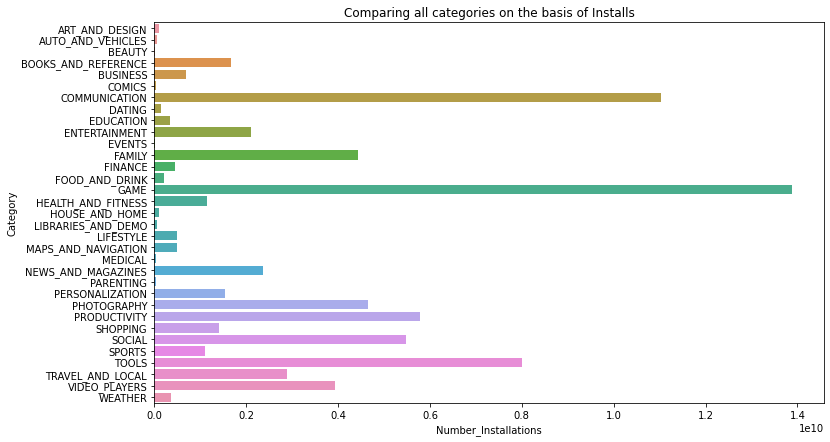

In [143]:
compare_all(data)

In [144]:
print('\nTabular Rep.Of Top 5 Number of Installation by Category')
display(data.nlargest(6,'Number_Installations'))


Tabular Rep.Of Top 5 Number of Installation by Category


,Category,Number_Installations
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4650147655


### Chúng ta sẽ xem số lượt tải, số lượt app với từng content

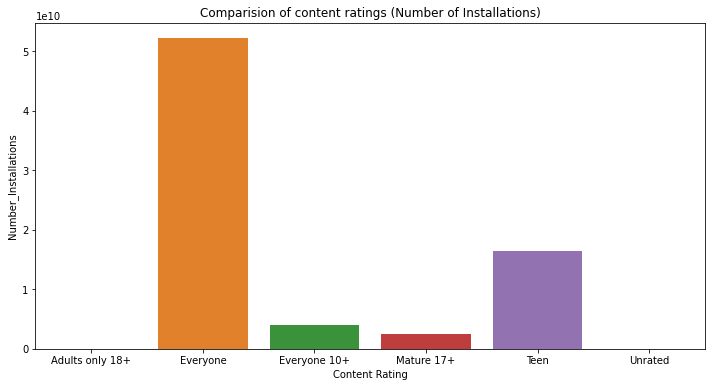

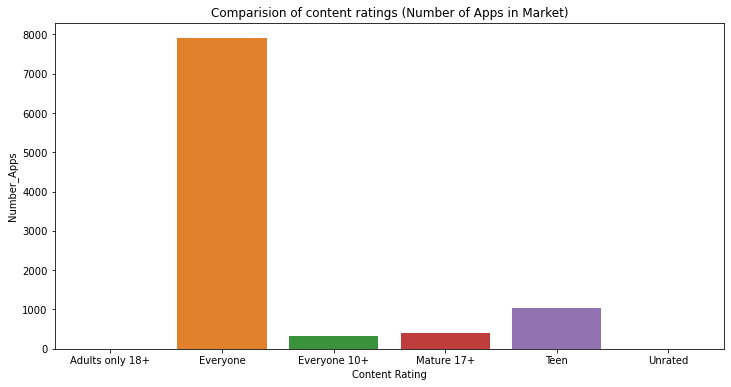

In [145]:
install_sum_content=df.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
app_sum_content=data=df.groupby('Content Rating')['Installs'].size().reset_index(name='Number_Apps')

def content_bar_sum(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Installations)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Installations'])
    plt.show(content_bar)
    
def content_bar_count(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Apps in Market)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Apps'])
    plt.show(content_bar)
    
content_bar_sum(install_sum_content)
content_bar_count(app_sum_content)

Có vẻ như 'Everyone' là lựa chọn duy nhất để chúng tôi thích. Nhưng không .... hãy đi sâu vào hai biểu đồ này nhiều hơn để có được thông tin tốt. Số lượng Ứng dụng 'Teen' ít hơn so với 'Everyone' nhưng khi chúng tôi kiểm tra 'Số lượt cài đặt' của ứng dụng, có vẻ như đây là lựa chọn tốt thứ hai.Chúng ta hãy xem tỉ lệ tải về của từng nội dung.  

In [147]:
#Temporary dataframe with improved comparision metric for content rating
content=pd.DataFrame()
content['Content Rating'] = app_sum_content['Content Rating']
content['No_Installations/Total_Apps']=install_sum_content['Number_Installations']/app_sum_content['Number_Apps']

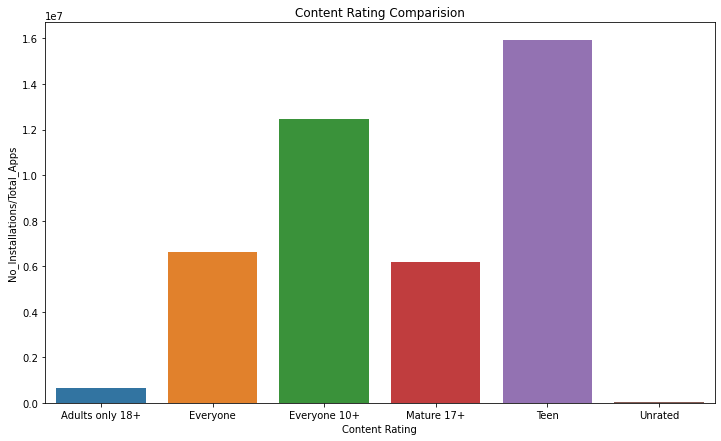

In [148]:
#Visualize content
figure=plt.figure(figsize=(12,7))
title=plt.title('Content Rating Comparision')
bar=sns.barplot(x=content['Content Rating'],y=content['No_Installations/Total_Apps'])
plt.show(bar)

Qua các cái trên ta có thể nhận ra làm app cho **Teen** về chủ đề **Game** thì 